# Guide to Wonky


In [6]:
import wonky
from wonky.models.__test_models__ import test_lattice_interact

In [1]:
%matplotlib inline
import numpy as np
from numba import jit

#list for trace, list for active flag, list for species count per site - capped, list for active particles of type
#reactions later will have a fast function that validates a reaction and then we choose one of viable by proportionate rate
def get_hyper_lattice(lattice,dim):
    size = lattice**dim
    return np.zeros(size,np.int8)
    
def put (lattice,i,species):
    lattice[i] |= (1<<species)
    return lattice[i]

def remove(lattice,i,species):
    lattice[i] &= ~(1<<species)
    return lattice[i]

def get (lattice,i,species):
    return lattice[i] & (1<<species)

@jit
def diffuse(i, length, dim):
    #this checks that we are on the same partition - jump should be float
    #torus: jump in the positive sense and mod by the next partition boundary
    def __wrapped__(i, idash,axis,jump):
        boundary = jump * length
        if (np.floor(i/boundary)!=np.floor(idash/boundary)):  
            return int((idash + boundary) % boundary)
        return idash
    choice = np.random.randint(2*dim)
    axis = int(choice/2.)
    sense = -1 if choice % 2 == 0 else 1
    jump = length**axis
    return __wrapped__(i, i + (sense * jump),axis,jump*1.)

@jit
def walk_lattice_from(lattice, size, i=5550, walk_length=500000):
    for n in range(walk_length):
        put(lattice,i,1)
        i = diffuse(i,*size)   
        
def display(lattice,dim,species):
    from matplotlib import pyplot as plt
    shape = np.zeros(dim,np.int)
    length = int(len(lattice)**(1/dim))
    shape[:] = length
    image = np.reshape(lattice,shape)
    return plt.imshow(image, "Blues")


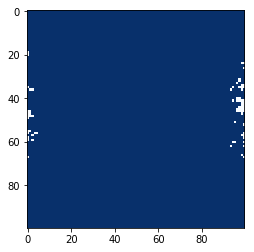

In [3]:
size = (100,2)
L = get_hyper_lattice(*size)
walk_lattice_from(L,size)
display(L,size[-1],1)

In [ ]:
#tests
#but multiple check values match expectation
#bin(r)
#int('11110000', 2)

r = put(L,0,2)
r = put(L,0,3)
get(L,0,2)
get(L,0,3)
get(L,0,4)
remove(L,0,3)
get(L,0,3)
